<div>
<img src="images/HW2_q1_1.png" width="1500"/>
</div>


<div>
<img src="images/HW2_q1_2.png" width="1500"/>
</div>



<div>
<img src="images/HW2_a1_1.png" width="1500"/>
</div>


<div>
<img src="images/HW2_a1_2.png" width="1500"/>
</div>


<div>
<img src="images/HW2_a1_3.png" width="1500"/>
</div>


<div>
<img src="images/HW2_a1_4.png" width="1500"/>
</div>

<div>
<img src="images/HW2_q2_1.png" width="1500"/>
</div>


<div>
<img src="images/HW2_q2_2.png" width="1500"/>
</div>


In [21]:
# -*- coding: utf-8 -*-
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import scipy as scipy

from numpy import genfromtxt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [22]:
df_X_train = genfromtxt('X_train.csv', delimiter=',')
df_Y_train = genfromtxt('Y_train.csv', delimiter=',')
df_X_test = genfromtxt('X_test.csv', delimiter=',')
df_Y_test = genfromtxt('Y_test.csv', delimiter=',')


In [23]:
#############################################################################


def class_prior ( Y_train):
    
    tot_records = len(Y_train)
    tot_spam =  np.sum(Y_train == 1)
    tot_not_spam =  np.sum(Y_train == 0)
    p_spam = tot_spam/tot_records
    p_not_spam = tot_not_spam/tot_records 
    pi_hat = tot_spam/tot_records
    return tot_records , tot_spam , tot_not_spam , p_spam , p_not_spam , pi_hat

#############################################################################

def class_conditional_Bernoulli (X_train , Y_train  , tot_spam , tot_not_spam):
    Tot_spam = [0 for col in range(54)]
    Tot_not_spam = [0 for col in range(54)]
    Theta_spam = [0 for col in range(54)]
    Theta_not_spam = [0 for col in range(54)]
    
    for j in range(54):    
        for i in range(len(X_train)):
      

# Calculating Total spam per parameter per class       
         if (Y_train[i] == 1.0):
            Tot_spam[j] = Tot_spam[j] + X_train[i][j]
         if (Y_train[i] == 0.0):
            Tot_not_spam[j] = Tot_not_spam[j] + X_train[i][j]
    
        Theta_spam[j] = Tot_spam[j] /tot_spam

        Theta_not_spam[j] = Tot_not_spam[j] /tot_not_spam
    
    return Theta_spam , Theta_not_spam 

#############################################################################

def class_conditional_Pareto(X_train , Y_train  , tot_spam , tot_not_spam):
    Tot_spam = [0 for col in range(0, 3)]
    Tot_not_spam = [0 for col in range(0, 3)]
    Theta_spam = [0 for col in range(0, 3)]
    Theta_not_spam = [0 for col in range(0, 3)]
    
    for j in range(0, 3):    
        for i in range(len(X_train)):
         if (Y_train[i] == 1.0):
            Tot_spam[j] = Tot_spam[j] + np.log(X_train[i][54+j])
         if (Y_train[i] == 0.0):
            Tot_not_spam[j] = Tot_not_spam[j] + np.log(X_train[i][54+j])   
        Theta_spam[j] =  tot_spam/Tot_spam[j]
        Theta_not_spam[j] =  tot_not_spam/Tot_not_spam[j]   
    return Theta_spam , Theta_not_spam 


In [24]:
 #############################################################################   
tot_records , tot_spam , tot_not_spam , p_spam , p_not_spam , Pi_Hat =  class_prior (df_Y_train)   

Theta_spam_Ber, Theta_not_spam_Ber =  class_conditional_Bernoulli (df_X_train , df_Y_train , tot_spam , tot_not_spam)


Theta_spam_preto, Theta_not_spam_preto =  class_conditional_Pareto (df_X_train , df_Y_train , tot_spam , tot_not_spam)

In [25]:
def posterior (Theta_spam_Ber , Theta_not_spam_Ber , Theta_spam_preto , Theta_not_spam_preto ,X_test):
  
      Bern_spam_1st_term =   np.power( Theta_spam_Ber ,  X_test[: , range(54)])  
      
      a =  [1-x for x in  X_test[: , range(54)]]
     
      b_spam =  [1-x for x in  Theta_spam_Ber]
       
      Bern_spam_2nd_term = np.power(b_spam, a)
      
      Predict_spam_Bern = np.multiply(Bern_spam_1st_term , Bern_spam_2nd_term)
      
      
      Bern_not_spam_1st_term =   np.power( Theta_not_spam_Ber ,  X_test[: , range(54)])  
      a =  [1-x for x in  X_test[: , range(54)]]
      b_not_spam =  [1-x for x in  Theta_not_spam_Ber]
      Bern_not_spam_2nd_term = np.power(b_not_spam, a)
      Predict_not_spam_Bern = np.multiply(Bern_not_spam_1st_term , Bern_not_spam_2nd_term)
      
      
      Pareto_spam_1st_term = [-1*(1+x) for x in  Theta_spam_preto]
      Pareto_spam_2nd_term = np.power(   X_test[: , range(54,57)] , Pareto_spam_1st_term)
      Predict_spam_pareto = np.multiply(Theta_spam_preto , Pareto_spam_2nd_term)
             
      
      Pareto_not_spam_1st_term = [-1*(1+x) for x in  Theta_not_spam_preto]
      Pareto_not_spam_2nd_term = np.power(   X_test[: , range(54,57)] , Pareto_not_spam_1st_term)
      Predict_not_spam_pareto = np.multiply(Theta_not_spam_preto , Pareto_not_spam_2nd_term)
         
     
      
      return  Predict_spam_Bern     , Predict_not_spam_Bern , Predict_spam_pareto , Predict_not_spam_pareto
        
#############################################################################         



def predict (Predict_spam_Bern , Predict_not_spam_Bern , Predict_spam_pareto , Predict_not_spam_pareto , p_spam , p_not_spam , Pi_Hat):
    
    
    Y_predict = []
    
    for i in range(93):
        # initialize to class prior probabilities
        prob_spam =  Pi_Hat
        prob_not_spam = 1 - Pi_Hat
        for j1 in range (54):
            prob_spam  = prob_spam * Predict_spam_Bern[i,j1]
            
        for k1 in range(3):
            prob_spam = prob_spam * Predict_spam_pareto[i,k1]
    
        for j2 in range (54):
            prob_not_spam  = prob_not_spam * Predict_not_spam_Bern[i,j2]
        for k2 in range(3):
            prob_not_spam = prob_not_spam * Predict_not_spam_pareto[i,k2]    
        
        if (prob_spam > prob_not_spam):
            Y_predict.append(1)
        else:
            Y_predict.append(0)

    return Y_predict


Naive Bayes 2 X 2 Table


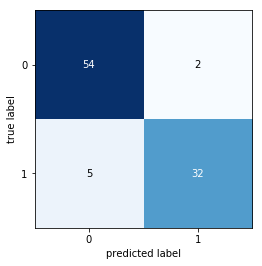

Naive Bayes Accuracy : 92.47311827956989 %


In [26]:

Predict_spam_Bern , Predict_not_spam_Bern , Predict_spam_pareto , Predict_not_spam_pareto = posterior ( Theta_spam_Ber , Theta_not_spam_Ber , Theta_spam_preto , Theta_not_spam_preto ,df_X_test)

Y_predict = predict (Predict_spam_Bern , Predict_not_spam_Bern , Predict_spam_pareto , Predict_not_spam_pareto , p_spam , p_not_spam, Pi_Hat)

## get the confusion Matrix .
c_mat = confusion_matrix(df_Y_test , Y_predict)
#print ("Confusion Matrix: \n" , c_mat)

print("Naive Bayes 2 X 2 Table")
fig, ax = plot_confusion_matrix(conf_mat=c_mat)
plt.show()

print ("Naive Bayes Accuracy :" , (c_mat.trace()/93.0 )*100 , "%")

In [27]:
###################################################################################
##  K-NN

## rows has  number of test data point 
## columns has number of training data points
def Diff_Matrix ( X_Train , X_test ):
    #Diff = np.zeros((len(X_test), len(X_Train))) 
    Diff_list = [[] for j   in range(len(X_test))]    
    
    for i in range(len(X_test)):
        for j in range(len(X_Train)):
        ## calcuate L1 distance.
           Diff = sum(abs(X_test[i] - X_Train[j])) 
           Diff_list[i].append((Diff , j) )
    return Diff_list


def KNN ( Diff_Matrix , X_train,Y_train,Y_test, K):
## we need the distance of the test vector  from each of the training vectors.
## hence we are interested in the Row  of the  Diff Matrix for each Test vector
    accuracy_list = []
    for k in range(1,K+1):
      
      Y_predict = []
      for i in range(len(Diff_Matrix)):
          Nearest = []          
          Nearest = sorted(Diff_Matrix[i],key=lambda x: x[0])[0:k]

          NN_values = []                   
          for n in Nearest: 

              index = n[1] 

              NN_values.append(Y_train[index])             
          if (np.average(NN_values) > 0.5):
              Y_predict.append(1)
          if (np.average(NN_values) < 0.5):
              Y_predict.append(0)  
          if (np.average(NN_values) == 0.5):
              Y_predict.append(randint(0,1))
 
      c_mat = confusion_matrix(list(Y_test) , list(Y_predict))
      #print ("KNN Confusion Matrix: \n" , c_mat)
      accuracy = c_mat.trace()/len(Y_predict)
      #print (k , "KNN Accuracy :" , accuracy*100 , "%")
      accuracy_list.append(accuracy)
    return accuracy_list  

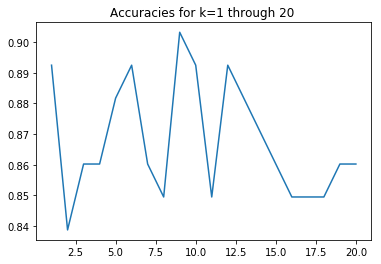

In [28]:
Diff_matrix =  Diff_Matrix(df_X_train , df_X_test)
accuracy_list = KNN (Diff_matrix , df_X_train,df_Y_train,df_Y_test, 20)

plt.figure(1)
plt.title("Accuracies for k=1 through 20 ")
plt.plot(range(1,21) ,accuracy_list) 


Text(0,0.5,'$\\Theta$')

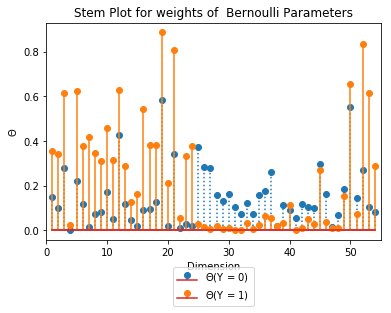

In [29]:
####################################################################################        
#stem plot
#plt.stem(sum(Predict_not_spam_Bern[range(0,93),:]), markerfmt=" ")
plt.figure(2)
#plt.stem(Theta_spam_Ber, markerfmt=" ")
#plt.figure(3)
#plt.stem(Theta_not_spam_Ber, markerfmt=" ")
#plt.show()


markerline, stemlines, baseline = plt.stem(range(1,55),Theta_not_spam_Ber, markerfmt='o', label="$\Theta$(Y = 0)")
plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
plt.setp(stemlines, 'linestyle', 'dotted')

markerline, stemlines, baseline = plt.stem(range(1,55),Theta_spam_Ber, markerfmt='o', label="$\Theta$(Y = 1)")
plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
plt.setp(stemlines, 'linestyle', 'solid')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1))
plt.title("Stem Plot for weights of  Bernoulli Parameters")
plt.xlim(0,55)
plt.xlabel("Dimension")
plt.ylabel("$\Theta$")


### Interpretation of parameters 16 and 52 


$\text{Parameter : 16 is the word “Free” and Parameter 52 is the character ‘!’ .}$

$\text{The } \hat{\theta}_{spam}$ $\text{ for “Free” is : 0.0911}$

$\text{The } \theta_{spam}$ $\text{  for “Free” is : 0.5450}$

$\text{The } \hat{\theta}_{spam}$ $\text{  for “!” is : 0.2690}$

$\text{The } \theta_{spam}$ $\text{  for “!“ is : 0.8333}$

$\text{Based on the Stem plot , the difference in }$ $\theta_{spam} \text{ for these two parameters is the highest
among all the other parameters.}$
$\text{ The }$ $\theta_{spam} \text{ is about 6X higher for  the word "Free" and it is  3X higher for '!' }$

$\text{Therefore it can be concluded that an email with the  word "Free" or ‘!’ are  likely to be classified as Spam.}$

$\text{This is intuitive since the words "Free" is used in promotional emails  and the exclaimation mark (!) is used  to create excitement in the audience.}$

### Logistic regression with Steepest Ascent

In [30]:
################################################################################### 
def preprocess ( X_train , X_test , Y_train , Y_test):
    Y_train_new = []
    Y_test_new = []   
    X_train_new = np.insert(X_train, 0, 1, axis=1)
    X_test_new = np.insert(X_test, 0, 1, axis=1)
    for y in Y_train:
        if (y == 1):
            Y_train_new.append(1)
        else:
            Y_train_new.append(-1)
    for y in Y_test:
        if (y == 1):
            Y_test_new.append(1)
        else:
            Y_test_new.append(-1)
    return np.matrix(Y_train_new) , np.matrix(Y_test_new), np.matrix(X_train_new), np.matrix(X_test_new)
            
            
#def Sigmoid (X_train, N):

Y_train_new , Y_test_new , X_train_new , X_test_new = preprocess( df_X_train , df_X_test , df_Y_train , df_Y_test)  
################################################################################################## 
def sigmoid( par):
  
   sigmoid =  scipy.special.expit(par) 
   
   if (sigmoid == 0 ):
       sigmoid = .0000000000001
   return sigmoid 


def Step(X_train_new , Y_train_new , W):
    
    temp = 0 
    w = np.matrix(W)   
    for i in   range(len(X_train_new)): 
       
        #print i , (X_train_new[i]  * W.T).shape, Y_train_new[0,i]
        par = X_train_new[i] * w.T * Y_train_new[0,i]
        #print "step"
        sig = (sigmoid( par[0,0])) 
        temp += (1- sig)*Y_train_new[0,i]*X_train_new[i]
    return temp.T
 

def get_Obj_fn(w, y_tr, x_tr):
    obj_fn = 0
    w = np.matrix(w)
    for i in range(x_tr.shape[0]):
        #print i 
        x =  np.matrix(x_tr[i])
        y =  np.matrix(y_tr[0,i]) 
        k = (x * w.T) * y 
        #print  x.shape ,w.shape , w.T.shape , y.shape ,y_tr,   k , "get_Obj_fn"
        sig = sigmoid(k)
        obj_fn += np.log(sig)
    return obj_fn

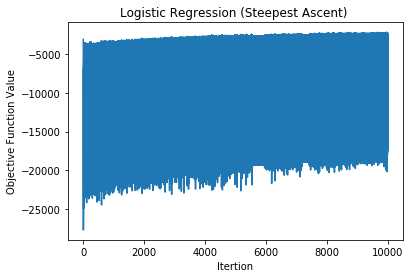

In [34]:
##################################################################################################    
W = []
W.append(np.matrix(np.zeros((X_train_new.shape[1]))))   
N = 10000
for t in range(1,N+1):
    eta  = 1/((10.0**5)*((N+1)**(.5)))
    step = Step (X_train_new , Y_train_new , W[t-1])
    update = eta * step
    W.append(W[t-1] + update.T)


L_log=[]
for t in range(len(W)):
    L_log.append(get_Obj_fn(W[t], Y_train_new, X_train_new)[0,0])

plt.figure(3)
  
plt.plot(L_log)
plt.title("Logistic Regression (Steepest Ascent) ")
plt.xlabel("Itertion")
plt.ylabel("Objective Function Value")
plt.show()

### Logistic regression with Newton's Method

In [36]:
def get_delta2_L(x_tr,w):
    l2_sum = np.zeros((x_tr.shape[1], x_tr.shape[1]))   
    w = np.matrix(w).T
    for i in range(x_tr.shape[0]):
        x =  np.matrix(x_tr[i]).T
        sig_inp = x.T * w
        sig = scipy.special.expit(sig_inp)       
        xxt = x*x.T
        k =sig*(1- sig)
        l2_sum = l2_sum + k[0,0]*xxt
    return -1*l2_sum

newtons objective fn


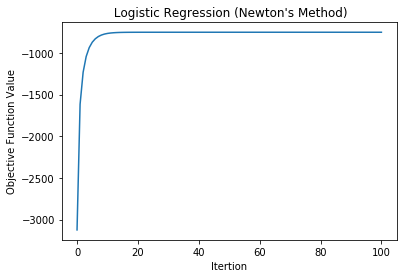

In [35]:
w_n = []
w_n.append(np.zeros((X_train_new.shape[1])))
iter = 100

for t in range(1,iter+1):
    #print t 
    eta  = 1/((t+1)**(.5))
    hess = get_delta2_L(X_train_new,w_n[t-1])
    hess_inv = np.linalg.inv(hess)
    l1 = Step(X_train_new, Y_train_new, w_n[t-1])
    update = eta * hess_inv*l1
    w_n.append(w_n[t-1] - update.T)
    
print ("newtons objective fn")    
L_newt=[]
for t in range(len(w_n)):
    #print t 
    L_newt.append(get_Obj_fn(w_n[t], Y_train_new, X_train_new)[0,0])

plt.figure(4)
plt.plot(L_newt)
plt.title(" Logistic Regression (Newton's Method)")
plt.xlabel("Itertion")
plt.ylabel("Objective Function Value")
plt.show()

acc = [] 
for t in range(iter):
    y_pred = [] 
    for i in  range(len(X_test_new)):
        x =  np.matrix(X_test_new[i])
        z = np.matrix(w_n[t])
        y  = sigmoid(x*z.T)
        if(y > .5):
            y_pred.append(1)
        else:
            y_pred.append(-1)
    c_mat = confusion_matrix(Y_test_new.T,y_pred )
    acc.append(c_mat.trace()/(len(X_test_new)*1.0) )
    